In [1]:
# import libraries for data analysis
%matplotlib notebook
#%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
#matplotlib.rcParams['figure.figsize'] = (14, 6)

In [2]:
# import the data
data = pd.read_csv("../data/3Pushes_Trial1.CSV")
sensor_distance = 0.195 # TODO: set to the proper distance (in m)

<IPython.core.display.Javascript object>


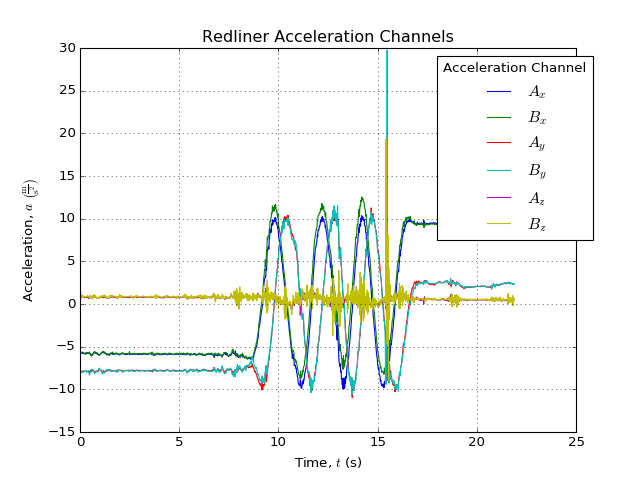

In [3]:
# plot everything as raw data
plt.figure()
plt.plot(data['Timestamp'], data['A_x'], label='$A_x$')
plt.plot(data['Timestamp'], data['B_x'], label='$B_x$')
plt.plot(data['Timestamp'], data['A_y'], label='$A_y$')
plt.plot(data['Timestamp'], data['B_y'], label='$B_y$')
plt.plot(data['Timestamp'], data['A_z'], label='$A_z$')
plt.plot(data['Timestamp'], data['B_z'], label='$B_z$')
plt.title('Redliner Acceleration Channels')
plt.ylabel('Acceleration, $a$ $\\left(\\frac{\\mathrm{m}}{\\mathrm{s}^2}\\right)$')
plt.xlabel('Time, $t$ (s)')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), title='Acceleration Channel')

In [4]:
# define a kalman filter function
def kalman(x, p=1, q=0.0001, r=0.01):
    # initialize the output
    y = np.zeros(len(x))
    
    # temporary variables
    x0 = 0
    
    # loop over the dataset
    for i in range(0, len(x)):
        # calculate the current gain
        k = (p + q) / (p + q + r)
        
        # update the prediction
        p = r * (p + q) / (p + q + r)
        
        # update the result
        xi = x0 + (x[i] - x0) * k
        x0 = xi
        y[i] = xi
        
    # return
    return y

In [5]:
t = data['Timestamp']
Ax = kalman(data['A_x'])
Ay = kalman(data['A_y'])
Az = kalman(data['A_z'])
Bx = kalman(data['B_x'])
By = kalman(data['B_y'])
Bz = kalman(data['B_z'])

<IPython.core.display.Javascript object>


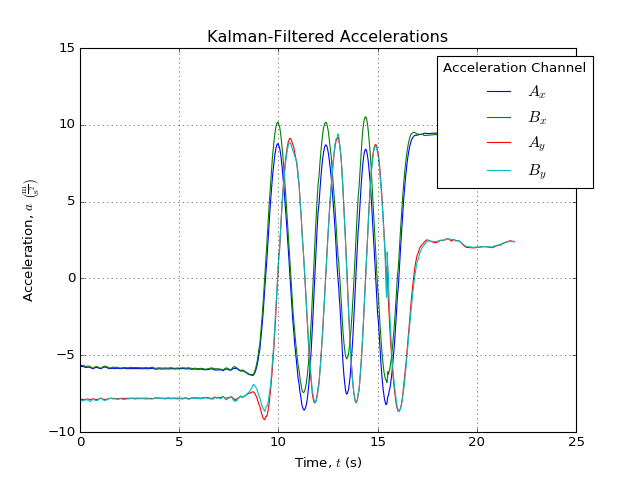

In [6]:
# plot everything as filtered by Kalman
plt.figure()
plt.plot(t, Ax, label='$A_x$')
plt.plot(t, Bx, label='$B_x$')
plt.plot(t, Ay, label='$A_y$')
plt.plot(t, By, label='$B_y$')
plt.title('Kalman-Filtered Accelerations')
plt.ylabel('Acceleration, $a$ $\\left(\\frac{\\mathrm{m}}{\\mathrm{s}^2}\\right)$')
plt.xlabel('Time, $t$ (s)')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), title='Acceleration Channel')

<IPython.core.display.Javascript object>


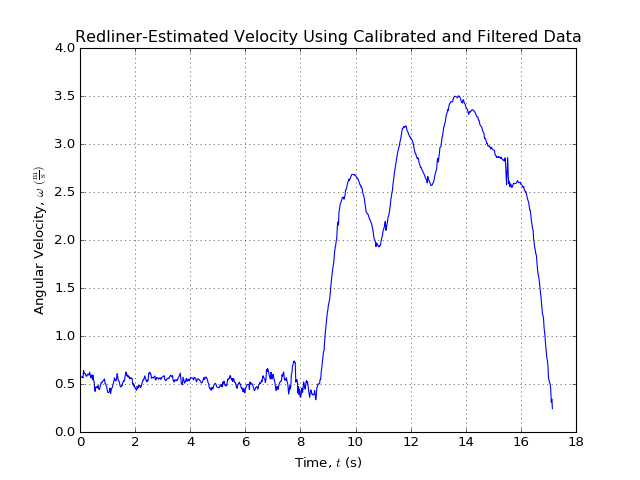

In [7]:
plt.figure()
plt.plot(t, np.sqrt(np.subtract(Bx, Ax) / sensor_distance))
plt.title('Redliner-Estimated Velocity Using Calibrated and Filtered Data')
plt.ylabel('Angular Velocity, $\omega$ $\\left(\\frac{\\mathrm{m}}{\\mathrm{s}}\\right)$')
plt.xlabel('Time, $t$ (s)')
plt.grid()